In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from agage_archive.io import read_nc, read_c, combine_datasets, read_ale_gage

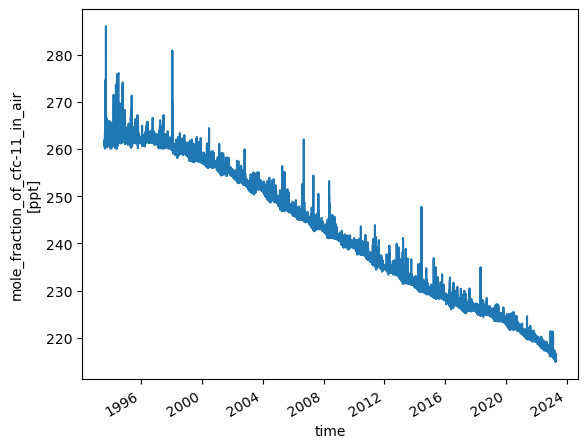

In [3]:
df_CGO = read_nc("cfc-11", "CGO", "GCMD")

df_CGO.mf.plot()


In [160]:
df = read_c("CH3CCl3", "ADR", "ALE")

<Axes: >

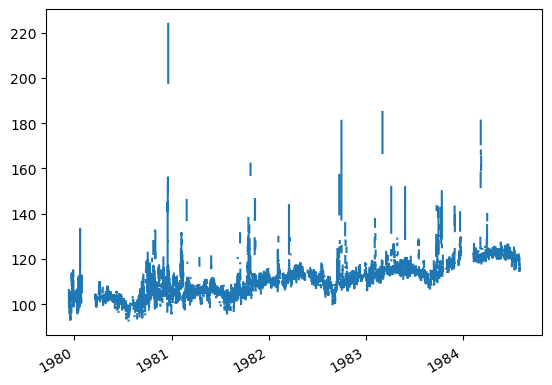

In [94]:
df["mf"].plot()


In [40]:
df_ale_gage = read_ale_gage("SMO", "GAGE")

<Axes: >

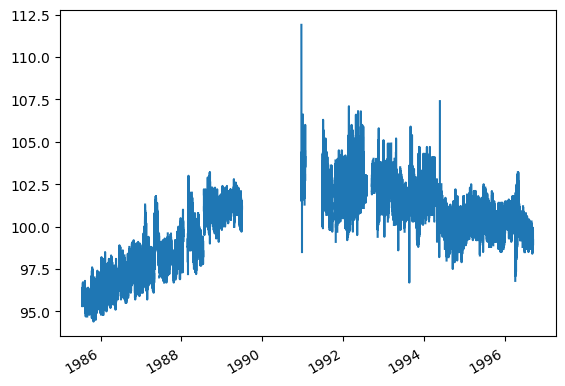

In [41]:
df_ale_gage["CCL4"].plot()